<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [342]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
import seaborn as sns
import plotly.express as px

In [343]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 
USER = 
PASSWORD = 
HOST = 
PORT = 

In [344]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

In [ ]:
br

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [111]:
# текст запроса
query_3_1 = f'''select count(id) from vacancies
'''


In [112]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1, connection)
df_3_1['count'][0]

49197

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [113]:
# текст запроса
query_3_2 = f'''select count(id) from employers
'''

In [114]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
df_3_2['count'][0]

23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [115]:
# текст запроса
query_3_3 = f'''select count(id) from areas
'''

In [116]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
df_3_3['count'][0]

1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [117]:
# текст запроса
query_3_4 = f'''select count(id) from industries
'''

In [118]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
df_3_4['count'][0]

294

***

# выводы по предварительному анализу данных
 - вакансий больше, чем работодателей в 2 раза
 - регионов больше, чем сфер деятельности в 4.6 раза

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [230]:
# текст запроса
query_4_1 = f'''
    select 
        a.name area,
        count(v.id) cnt /*подсчитываем количество вакансий*/
    from 
        vacancies v
        JOIN areas a on a.id = v.area_id
    GROUP by a.name
    ORDER by 2 DESC
'''

In [231]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [232]:
# текст запроса
query_4_2 = f'''
    select 
        count(id)
    from 
        vacancies 
    WHERE
        (salary_from IS NOT NULL)
        OR (salary_to IS NOT NULL)
    
'''

In [233]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2['count'][0]

24073

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [234]:
# текст запроса
query_4_3 = f'''
    select 
        salary_from,
        salary_to
    from 
        vacancies 
    WHERE
        (salary_from IS NOT NULL)
        OR (salary_to IS NOT NULL)
    
'''

In [235]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
salary_from_mean = df_4_3['salary_from'].mean()
salary_to_mean = df_4_3['salary_to'].mean()
print(round(salary_from_mean), round(salary_to_mean))

71065 110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [236]:
# текст запроса
query_4_4 = f'''
    select distinct /*выбираем уникальные значения*/
        schedule,
        employment,
        count(id) /*подсчитываем вакансии*/
    from 
        vacancies 
    GROUP by schedule, employment
    ORDER by 3 DESC
    
'''

In [237]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [238]:
# текст запроса
query_4_5 = f'''
    select distinct
        experience,
        count(id)
    from 
        vacancies 
    GROUP by experience /*группируем по опыту*/
    ORDER by 2
    
'''

In [239]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

# выводы по детальному анализу вакансий
 - только у половины вакансий указана заработная плата
 - средняя заработная плата от 71 тыc.руб.
 - в 15,8% вакансий указана "удаленная работа - полная занятость"
 - более половины вакансий требуют опыт от 1 года до 3 лет, лишь 14.6% вакансий - без опыта

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [241]:
# текст запроса
query_5_1 = f'''
    select 
        e.name employers,
        count(v.id) cnt
    from 
        vacancies v
        JOIN employers e on e.id = v.employer_id /*объединяем таблицу вакансий с таблице работодателей методом JOIN по employer_id*/
    GROUP by e.name
    ORDER by 2 DESC 
    LIMIT 5
'''

In [242]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
print(df_5_1['employers'][0],' - ' ,df_5_1['employers'][4])

Яндекс  -  Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [243]:
# текст запроса
query_5_2 = f'''
    select 
        a.name,
        count(e.id) employers_cnt,
        count(v.id) vacancies_cnt
    from 
        areas a
        JOIN employers e ON e.area = a.id
        LEFT JOIN vacancies v ON v.area_id = a.id /*так как локаций больше чем вакансий используем мето LEFT JOIN*/
    GROUP by a.name
    HAVING count(v.id) = 0
    ORDER by 2 DESC
    LIMIT 1
'''

In [244]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2['name'][0]

'Россия'

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [245]:
# текст запроса
query_5_3 = f'''
with x as (  /* делаем выборку из объединённой таблицы */
    SELECT distinct
        e.id employers, 
        v.area_id areas
    from 
        employers e
        JOIN vacancies v ON v.employer_id = e.id
   )

SELECT 
    count(areas) area_cnt /*подсчитываем количество регионов*/
from x
GROUP by x.employers
order by 1 DESC
'''

In [246]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3['area_cnt'][0]

181

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [247]:
# текст запроса
query_5_4 = f'''
select 
    count(*) cnt
from
    employers e
    LEFT JOIN employers_industries ei on e.id = ei.employer_id /*используем LEFT JOIN так как у работодателя может быть несколько сфер деятельности*/
WHERE industry_id IS NULL
'''

In [248]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4['cnt'][0]

8419

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [249]:
# текст запроса
query_5_5 = f'''
select 
    e.name,
    count(industry_id)
from employers e
    LEFT JOIN employers_industries ei on e.id = ei.employer_id
WHERE industry_id IS NOT NULL /*выбираем из ненулевых значений*/
GROUP by e.name
HAVING count(industry_id) = 4 /*указываем количестов сфер деятельности*/
ORDER by name /*сортируем в алфавитном порядке по имени*/
offset 2 /*отбрасываем 2 строки сферху*/
LIMIT 1 /*выводим только 3ю строку*/
'''

In [250]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5['name'][0]

'2ГИС'

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [251]:
# текст запроса
query_5_6 = f'''
select 
    count(*) cnt
from employers e
    LEFT JOIN employers_industries ei on e.id = ei.employer_id /*объединяем LEFT JOIN потому что может быть несколько сфер деятельности*/
    JOIN industries i on i.id = ei.industry_id
WHERE industry_id = '7.540' /*указываем id сферы деятельности*/
'''

In [252]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6['cnt'][0]

3553

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [253]:
# код для получения списка городов-милионников

url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' # Определяем адрес страницы
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
links = page.find_all('a') # находим все ссылки на странице
million_cities = [link.text for link in links[46:62]] #формируем список городов из текста на ссылках
mc_df = pd.DataFrame(million_cities, columns=['name']) #создаем dataframe на основе списка
mc_df

,name
0,Москва
1,Санкт-Петербург
2,Новосибирск
3,Екатеринбург
4,Казань
5,Нижний Новгород
6,Красноярск
7,Челябинск
8,Самара
9,Уфа


In [254]:
# текст запроса
query_5_7 = f'''
select distinct /*получаем уникальные названия городов и подсчитываем количество вакансий*/
    a.name,
    count(v.id) cnt
from 
    vacancies v
    JOIN employers e ON e.id = v.employer_id
    JOIN areas a ON a.id = v.area_id
WHERE employer_id = 1740
group by a.name
order by cnt DESC
'''

In [255]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
# объединяем mc_df и df_5_7 по колонке name
result_df = mc_df.join(df_5_7.set_index('name'), on='name')
#формируем строку Total
total = result_df['cnt'].sum()
total_row = {'name':'Total','cnt':total}
#добавляем строку к таблице
result_df = result_df.append(total_row, ignore_index=True)
result_df

,name,cnt
0,Москва,54
1,Санкт-Петербург,42
2,Новосибирск,35
3,Екатеринбург,39
4,Казань,25
5,Нижний Новгород,36
6,Красноярск,23
7,Челябинск,22
8,Самара,26
9,Уфа,26


***

In [ ]:
# выводы по анализу работодателей
- На первом месте по количеству вакансий компания Яндекс
- Регион "Россия" с большим числом работодателей у которых нет вакансий
- 3553 компании занимаются Разработкой программного обеспечения
- на города миллионники приходится 485 вакансий компании Яндекс, больше всего в Москве - 54

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [256]:
# текст запроса
query_6_1 = f'''
with x as (
select 
    lower(v.name) vac /*получаем названия вакансий в нижнем регистре*/
from 
    vacancies v
)
select count(*) vac_cnt
from x
WHERE 
    vac like '%data%' /*сортируем по совпадениям в названии вакансии*/
    OR vac like '%данн%'
'''

In [257]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1['vac_cnt'][0]

1771

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [258]:
# текст запроса
query_6_2 = f'''
with x as (
select 
    lower(v.name) vac, /*получаем название вакансии в нижнем регистре*/
    experience, /*получаем опыт*/
    employment /*тип трудоустройства*/
from 
    vacancies v
)
select count(*)
from x
WHERE 
    (vac like '%data scientist%' /*делаем выборку по ключевым совпадениям*/
    OR vac like '%data science%'
    OR vac like '%исследователь данных%'
    OR vac like '%ml%' 
    OR vac like '%machine learning%'
    OR vac like '%машинн%обучен%%')
    AND vac not like '%html%'
    AND (vac like '%junior%'
    OR experience = 'Нет опыта'
    OR employment = 'Стажировка')
'''

In [259]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2['count'][0]

51

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [260]:
# текст запроса
query_6_3 = f'''
with x as (
select 
    lower(v.name) vac, /*вакансия в нижнем регистре*/
    lower(v.key_skills) ks, /*ключевой навык в нижнем регистре*/
    experience, /*опыт*/
    employment /*варинт трудоустройства*/
from 
    vacancies v
)
select count(*)
from x
WHERE /*делаем выборку по сопадения*/
    (vac like '%data scientist%'
    OR vac like '%data science%'
    OR vac like '%исследователь данных%'
    OR vac like '%ml%' 
    OR vac like '%machine learning%'
    OR vac like '%машинн%обучен%%')
    AND vac not like '%html%' /*исключаем html*/
    AND (ks like '%sql%'
        OR ks like '%postgres%')
    AND vac not like '%teamlead%' /*исключаем teamlead*/
'''

In [261]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3['count'][0]

201

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [265]:
# текст запроса
query_6_4 = f'''
with x as (
select 
    lower(v.name) vac,
    lower(v.key_skills) ks

from 
    vacancies v
)
select count(*)
from x
WHERE 
    (vac like '%data scientist%'
    OR vac like '%data science%'
    OR vac like '%исследователь данных%'
    OR vac like '%ml%' 
    OR vac like '%machine learning%'
    OR vac like '%машинн%обучен%%')
    AND vac not like '%html%'
    AND vac not like '%teamlead%'
    AND ks like '%python%'
'''

In [266]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4['count'][0]

351

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [269]:
# текст запроса
query_6_5 = f'''
with x as (
select 
    lower(v.name) vac,
    lower(v.key_skills) ks
from 
    vacancies v
)
select 
    ks
from x
WHERE 
    (vac like '%data scientist%'
    OR vac like '%data science%'
    OR vac like '%исследователь данных%'
    OR vac like '%ml%' 
    OR vac like '%machine learning%'
    OR vac like '%машинн%обучен%%')
    AND vac not like '%html%'
    AND vac not like '%teamlead%'
    AND vac not like '%qml%'
'''

In [270]:
# результат запроса
df_6_5= pd.read_sql_query(query_6_5, connection)
df_6_5['ks']

def get_mean_ks (args):
    """Функция get_mean_ks() подсчитывает количество элементов в строке

    Args:
        args (_str_): _ключевые навыки DS_

    Returns:
        _int_: _количество ключевых навыков у вакансии DS_
    """
    #проверяем если аргумент не NULL
    if pd.isnull(args) == False:
        #создаем список навыков методом split
        arg_list = args.split('\t')
        #подсчитываем элементы в списке и записываем в переменную count
        count = len(arg_list)
        #возрващаем count
        return count
    #иначе возвращаем None
    else:
        return None

#создаем колонку mean_ks в наше датафрейме df_6_5
df_6_5['mean_ks'] = df_6_5['ks'].apply(get_mean_ks)
#получаем среднее по колонке mean_ks и округляем до 2х знаков
round(df_6_5['mean_ks'].mean(),2) 


6.41

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [271]:
# текст запроса
query_6_6 = f'''
with xx as (
    with x as (
    select 
        lower(v.name) vac, /*вакансия в нижнем регистре*/
        lower(v.key_skills) ks, /*ключевые навыки в нижнем регистре*/
        experience, /*требуемый опыт*/
        salary_from, /*верхняя зп*/
        salary_to /*нижняя зп*/
    from 
        vacancies v
    )
    select 
        salary_from sfo,
        salary_to sto,
        experience ex
    from x
    WHERE 
        (vac like '%data scientist%'
        OR vac like '%data science%'
        OR vac like '%исследователь данных%'
        OR vac like '%ml%' 
        OR vac like '%machine learning%'
        OR vac like '%машинн%обучен%%')
        AND vac not like '%html%'
        AND vac not like '%teamlead%'
        AND vac not like '%qml%'
)

Select 
    ex,
    (coalesce(sfo, 0) + coalesce(sto, 0))/2 salary_mean /*через функцию заменяем пустые значения на 0 для верного подсчета*/
FROM xx 
WHERE sfo is not null /*выбираем где обе зп указаны*/
    AND sto is not null
UNION ALL
Select 
    ex,
    sfo salary_mean
FROM xx 
WHERE sfo is not null /*если указана только вернхняя зп её указываем как среднюю*/
    AND sto is null
UNION ALL
Select 
    ex,
    sto salary_mean
FROM xx 
WHERE sfo is null 
    AND sto is not null /*если указана только нижняя зп её указываем как среднюю*/
ORDER by 2 DESC /*сортируем по средней зп*/ 
'''

In [272]:
# результат запроса
df_6_6= pd.read_sql_query(query_6_6, connection)
round(df_6_6[df_6_6['ex'] == 'От 3 до 6 лет']['salary_mean'].mean())

243115

***

In [ ]:
# выводы по предметному анализу
- имеют отношение к данным 1771 вакансия (3,5% от общего числа вакансий)
- из них 51 вакансия для DS без опыта и уровня junior или на стажировку
- в 201 вакансии ключевыми навыками указаны SQL и postgre (±43% от всех вакансий DS)
- в 351 вакансии ключивым навыком указан Python (±75% от всех вакансий DS)
- в среднем на вакансию DS указывают 6.41 ключевых навыков
- в среднем DS c опытом от 3 до 6 лет может расчитывать на зарплату 243115 руб. - это ± в 1.5 раза больше верхней границы вилки зп.

# Общий вывод по проекту

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
- вывод и доп анализ ниже

# проведём дополнительны анализ


# Запрос 7_1: 
- Построим Boxplot по распределению зарплат в городах миллионниках (Москва, Спб, город-миллионник, другие)

In [274]:
query_7_1 = f'''
with x as (
select 
    a.name city, /*название города или локации*/
    salary_from sfo, /*вехняя зп*/
    salary_to sto /*нижняя зп*/
from 
    vacancies v 
    JOIN employers e ON e.id = v.employer_id /*используем JOIN для точного и быстрого сопосталвения*/
    JOIN areas a ON a.id = v.area_id
)
select 
    city, /*получаем название*/
    (coalesce(sfo, 0) + coalesce(sto, 0))/2 salary_mean /*получаем среднюю зп, пропуски подменяем на 0, для корректного подсчета*/
FROM x 
WHERE sfo is not null 
    AND sto is not null
UNION ALL /*соеднияем все выборки через UNION ALL*/
Select 
    city,
    sfo salary_mean
FROM x 
WHERE sfo is not null 
    AND sto is null
UNION ALL
Select 
    city,
    sto salary_mean
FROM x 
WHERE sfo is null 
    AND sto is not null
ORDER by 2 DESC /*сортируем по средней зп*/
'''

другие              13539
город-миллионник     7739
Москва               1592
Санкт-Петербург      1203
Name: city_type, dtype: int64

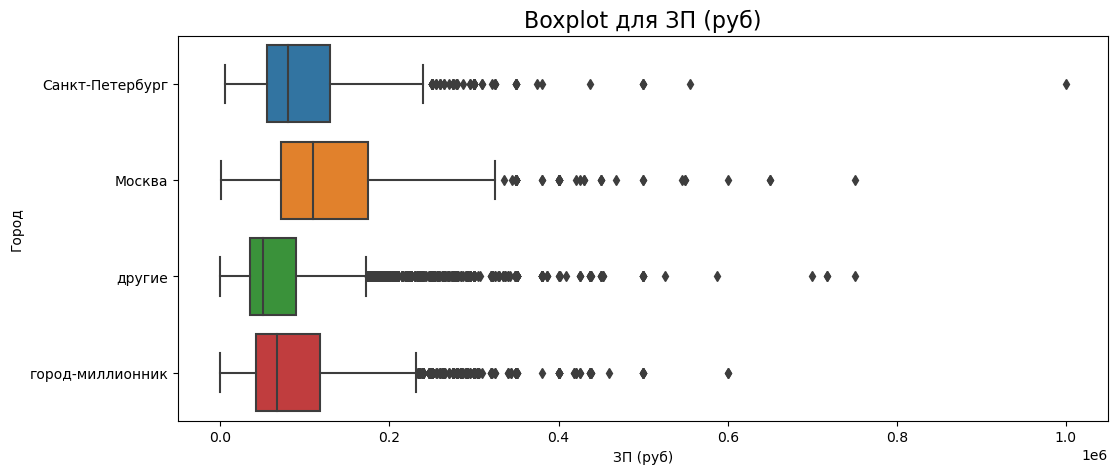

In [275]:
def get_city(city): 
    """ Функция get_city(city) обрабатывает колонку "city", таким образом
    преобразует значения в 4 категории: "Москва", "Санкт-Петербург" , "город-миллионник" , "другие".
    
    Args:
        city (str): значение колонки "город"

    Returns:
        _str_: категория(тип) города
    """
    main_cities = ['Москва','Санкт-Петербург']
    million_cities = ['Новосибирск', 
                      'Екатеринбург',
                      'Нижний Новгород',
                      'Казань',
                      'Челябинск',
                      'Омск',
                      'Самара',
                      'Ростов-на-Дону',
                      'Уфа', 
                      'Красноярск',
                      'Краснодар',
                      'Пермь', 
                      'Воронеж',
                      'Волгоград']
            
    if city in million_cities:
    
        city_type = 'город-миллионник'
    
    elif city in main_cities:
    
        city_type = city
    else:
    
        city_type = 'другие'
    
    return city_type

df_7_1= pd.read_sql_query(query_7_1, connection)
#заполняем атрибут city_type через функцию apply(get_city)
df_7_1['city_type'] = df_7_1['city'].apply(get_city)

display(df_7_1['city_type'].value_counts())
#строим график
fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(data=df_7_1, x='salary_mean', y='city_type')
boxplot.set_title('Boxplot для ЗП (руб)', fontsize=16)
boxplot.set_xlabel('ЗП (руб)')
boxplot.set_ylabel('Город');

<img src="./img/img_7_1_boxplot.png" alt="Boxplot для ЗП(руб)" />

# ввывод по графику 7_1:
 - замечаем что, средняя зп в основных городах больше чем в остальных, при этом вакансий меньше: это говорит о том что в Москве и СПб требуются более высокооплачиваемые вакансии.

______________________________________________________________________________________________________________________
# Запрос 7_2
- Построим Boxplot по распределению зарплат в городах миллионниках (Москва, Спб, город-миллионник, другие) для зп от 300тыc.руб.

In [277]:
query_7_2 = f'''
with x as (
select 
    a.name city,
    salary_from sfo,
    salary_to sto
from 
    vacancies v
    JOIN employers e ON e.id = v.employer_id
    JOIN areas a ON a.id = v.area_id
)
select 
    city,
    (coalesce(sfo, 0) + coalesce(sto, 0))/2 salary_mean
FROM x 
WHERE ((coalesce(sfo, 0) + coalesce(sto, 0))/2) > 300000 /*выбираем среднюю больше 300000*/
UNION ALL
Select 
    city,
    sfo salary_mean
FROM x 
WHERE sfo > 300000 /*выбираем среднюю больше 300000*/
    AND sto is null
UNION ALL
Select 
    city,
    sto salary_mean
FROM x 
WHERE sfo is null 
    AND sto > 300000 /*выбираем среднюю больше 300000*/
ORDER by 2 DESC /*сортируем по средней зп*/

'''

другие              122
город-миллионник     95
Москва               64
Санкт-Петербург      21
Name: city_type, dtype: int64

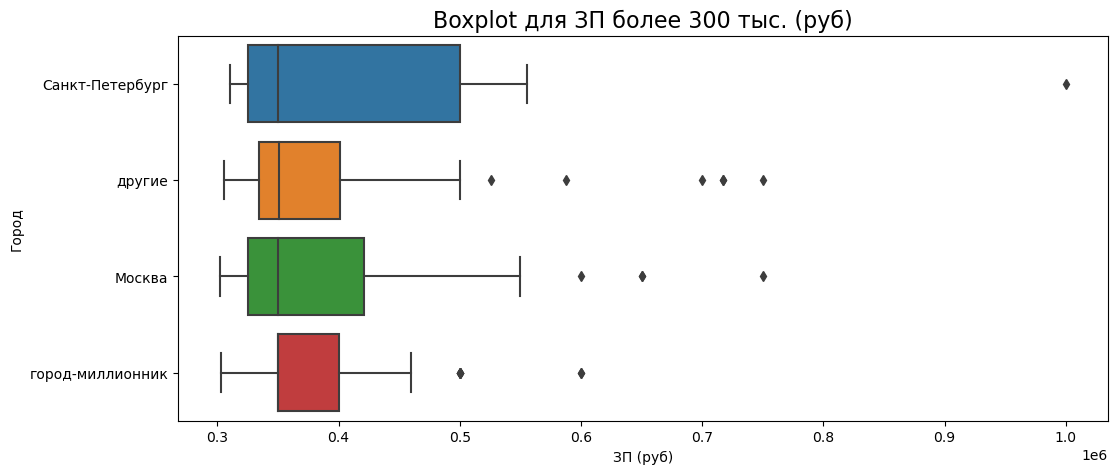

In [278]:
df_7_2= pd.read_sql_query(query_7_2, connection)
#заполняем city_type
df_7_2['city_type'] = df_7_2['city'].apply(get_city)
display(df_7_2['city_type'].value_counts())

fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(data=df_7_2, x='salary_mean', y='city_type')
boxplot.set_title('Boxplot для ЗП более 300 тыс. (руб)', fontsize=16)
boxplot.set_xlabel('ЗП (руб)')
boxplot.set_ylabel('Город');

<img src="./img/img_7_2_boxplot.png" alt="Boxplot для ЗП более 300 тыс.(руб)" />

# ввывод по графику 7_2:
 - замечаем что, средняя зп примерно одинаковая: по количеству вакансий лидируют другие города и города-миллионники: это говорит о высокой конкуренции за высокооплачиваемых специалистов с ЗП более 300 тыс.руб.

_______________________________________________________________________________________________________________________
# Запрос 7_3
- Проанализируем вакансии от 300тр более детально, выясним количество и ключевые навыки этих вакансий

In [287]:
query_7_3 = f'''
with x as (
select 
    a.name city, /*название города / локации */
    lower(v.name) vac, /*название вакансии в нижнем регистре*/
    lower(v.key_skills) ks, /*ключевые навыки в нижнем регистре*/
    salary_from sfo, /*верхняя зп*/
    salary_to sto /*нижняя зп*/
from 
    vacancies v
    JOIN employers e ON e.id = v.employer_id
    JOIN areas a ON a.id = v.area_id
)
select 
    city,
    vac,
    ks,
    (coalesce(sfo, 0) + coalesce(sto, 0))/2 salary_mean
FROM x 
WHERE ((coalesce(sfo, 0) + coalesce(sto, 0))/2) > 300000 /*где средняя зп больше 300000*/
UNION ALL
Select 
    city,
    vac,
    ks,
    sfo salary_mean
FROM x 
WHERE sfo > 300000 
    AND sto is null
UNION ALL
Select 
    city,
    vac,
    ks,
    sto salary_mean
FROM x 
WHERE sfo is null 
    AND sto > 300000
ORDER by 4 DESC /*сортируем по убыванию средней зп*/

'''

In [288]:
# проверяем данные на пропуски
df_7_3 = pd.read_sql_query(query_7_3, connection)
cols_null_percent = df_7_3.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

ks    5.629139
dtype: float64

# вывод: 
- в данных практически нет пропусков, это говорит об их хорошей информативности

In [289]:
#ТОП 30 вакансий по количеству
df_7_3['vac'].value_counts().head(30)

руководитель направления разработки                              12
директор научно-исследовательского центра (химия)                10
senior ios developer                                              8
devops engineer                                                   6
devops инженер                                                    5
system engineer (devops)                                          5
senior java developer                                             5
qa lead (remote)                                                  5
devops engineer (удаленно)                                        5
react+node.js developer for ai conversation platform (remote)     4
архитектор приложений                                             4
middle python developer (удаленно)                                4
scala-разработчик - продуктовая и финтех разработка               4
senior/middle go developer                                        4
teamlead go                                     

In [290]:
#список вспомогательных функций
def get_list_ks (args):
    """Функция get_list_ks() подсчитывает количество элементов в строке

    Args:
        args (_str_): _ключевые навыки DS_

    Returns:
        _int_: _количество ключевых навыков у вакансии DS_
    """
    #проверяем если аргумент не NULL
    if (pd.isnull(args) == False) :
        #создаем список навыков методом split
        arg_list = args.split('\t')
        #возрващаем arg_list
        return arg_list
    #иначе возвращаем None
    else:
        return ['пусто']

def contains_ks(ks_list, ks_name):
    """Функция contains_ks() проверяет включение ключевого навыка в общий лист ключевых навыков

    Args:
        ks_list (list): уникальный список всех ключевых навыков
        ks_name (str): имя ключевого навыка
    Returns:
        int: 1 если навык в списке, иначе 0
    """     
    # Если ks есть в текущем ks_list,
    if ks_name in ks_list:   
        # возвращаем значение 1
        return 1 
    # Если ks нет в текущем ks_list,
    else: 
        # возвращаем значение 0
        return 0


def get_all_ks(df):
    """Функция get_all_ks() получает множество всех навыков

    Args:
        df (dataframe): таблица с колонкой list_ks
        
    Returns:
        set: множество всех навыков
    """  
    result = set()
        
    for each in df['list_ks']:
        result.update(x for x in each) 
    return result

In [300]:
if 'ks' in df_7_3.columns:
    #создаем колонку list_ks в наше датафрейме df_7_3
    df_7_3['list_ks'] = df_7_3['ks'].apply(get_list_ks)
    #удаляем колонку ks если есть
    df_7_3 = df_7_3.drop(['ks'],axis=1)
#получаем список всех ks
all_ks = get_all_ks(df_7_3)
all_ks_list = list(all_ks) + ['пусто']
#создаем df для колонк с ключевыми навыками и заполняем через contains_ks()
df_ks =pd.DataFrame()
for each in all_ks_list:
    df_ks[each] = df_7_3['list_ks'].apply(contains_ks, ks_name=each)
   
# Заменяем список ks в list_ks на их количество 
df_ks['ks_cnt'] = df_7_3['list_ks'].apply(len) 
# добавляем строку Total
df_ks.loc['Total']= df_ks.sum()

# получаем значения из строки Total 
total_row=df_ks.iloc[-1][:-1] 
#формируем строку топ 10 ключевых навыков   
pop_ks = total_row.sort_values(ascending=False).head(10)
#заносим в список 
pop_ks_10_list = pop_ks.index.to_list()
#объединяем обратно таблицу и ключевые навыки
merged_df = df_7_3.join(df_ks)

#tree_df = merged_df.groupby('city').sum().sort_values(by='ks_cnt', ascending=False)

#строим график
fig = px.treemap(
    data_frame=merged_df, #DataFrame
    path=['city','vac', merged_df.index], #категориальный признак, для которого строится график
    values='salary_mean', #параметр, который сравнивается
    color='salary_mean',
    height=500, #высота
    width=1000, #ширина
    title='ТОП регионов по вакансиям с зп от 300 тыс.руб.' #заголовок
)

#отображаем график
fig.show()


<img src="./img/img_7_3_treemap.png" alt="ТОП регионов по вакансиям более 300 тыс.(руб)" />

# вывод по графику "ТОП регионов по вакансиям" с зп 300тыс руб
- мы видим что основные вакансии состредоточены в Москве, CПб, Новосибирск
- приэтом зарплатный средний бюджет Москвы в 3 раза превышает его ближайщего конкурента СПб: Это говорит о высокой потребности в высокооплачиваемых специалистах в Москве. При этом средние зарплаты выше именно в СПб и самая дорогая вакансия находится в СПб

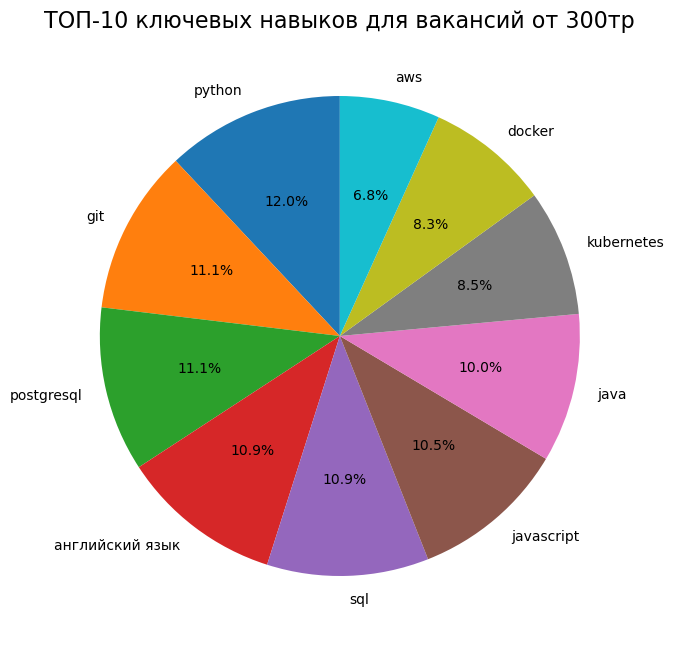

In [301]:
#строим топ10 ключевых навыков для вакансий от 300тр
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    pop_ks,
    labels=pop_ks.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('ТОП-10 ключевых навыков для вакансий от 300тр', fontsize=16)
plt.show(pie)

<img src="./img/img_7_3_kspie.png" alt="ТОП регионов по вакансиям более 300 тыс.(руб)" />

# вывод о топ10 ключевых навыков от 300 тр
 - python, git, postgres самые популярный ключевые навыки упоминаемые в вакансиях от 300тр

# <center>8. Работа с пропусками

In [302]:
#проанализируем таблицу vacancies на наличие пропусков
query_8_1 = f'''select * 
    from vacancies
    ORDER by salary_to DESC, salary_from DESC, key_skills DESC /*сортируем по зп и ключевым навыкам для heatmap*/
'''

In [303]:
df_8_1= pd.read_sql_query(query_8_1, connection)
display(df_8_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49197 entries, 0 to 49196
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49197 non-null  int64  
 1   name         49197 non-null  object 
 2   key_skills   40741 non-null  object 
 3   schedule     49197 non-null  object 
 4   experience   49197 non-null  object 
 5   employment   49197 non-null  object 
 6   salary_from  21485 non-null  float64
 7   salary_to    12690 non-null  float64
 8   area_id      49197 non-null  int64  
 9   employer_id  49197 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.8+ MB


None

In [304]:
cols_null_percent = df_8_1.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

salary_to      74.205744
salary_from    56.328638
key_skills     17.188040
dtype: float64

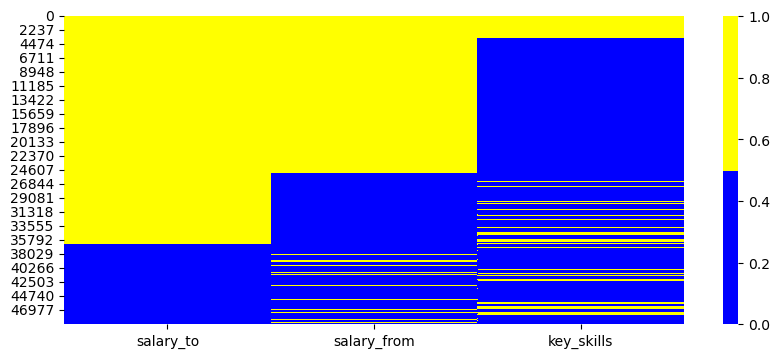

In [305]:

colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    df_8_1[cols].isnull(),
    cmap=sns.color_palette(colors),
)

<img src="./img/img_8_1_heatmap.png" alt="Пропуске в таблице vacancies" />

# выводы по анализу пропусков: 
- 8456 вакансий из таблицы не имею ни начальной, ни верхней зп, ни описания ключевых навыков - скорее всего это потенциальные неверно указанные данные.
- при этом пропуски в ключевых навыках отсуствую в вакансиях где не указана зп - это говорит о том, что информация по ЗП намеренно скрывается для этих вакансий.
- у вакансий у которых не указана начальная зп, чаще либо указана верхняя зп либо ключевые навыки
- в вакансиях с указаной верхней зп видим четкий градиент по ключевым навыкам - чем меньше зп, тем больше пропусков в ключевых навыках: это говорит о том, что в высокоплачиваемыемых вакансиях навыки прописаны лучше. А также косвенно намекает на то, что вакансии у которых верхняя зп не указана и есть описаение ключевых навыков - являются высокооплачиваемыми.


дальнейшее исследование выполним следующим образом:
2. проанализируем вакансии у работодателя которых не указана сфера деятельности, но указана зп
3. проанализируем вакансии у работодателя которых указана 1 сфера деятельности и зп.
4. проанализируем вакансии у работодателей у которых более 4 сферы деятельности и зп.
5. проанализируем вакансии от работодателей у которых одна и более сфера деятельности, но ЗП не указано.


In [307]:
query_8_2 = f'''
with vacancies_new as (/*формируем таблицу vacancies_new*/

with employer_w_ind as (/*формируем таблицу работодателей со сферой деятельности*/
select 
    e.id emp_ind_id, /*id работодателя*/
    e.name emp_ind_name, /*название работодателя*/
    count(industry_id) ind_ctn /*количество сфер дейтельности*/
from employers e
    LEFT JOIN employers_industries ei on e.id = ei.employer_id /*используе LEFT JOIN так как сфер дейятельности может быть несколько*/
WHERE industry_id IS NULL
GROUP by e.name, e.id /*группируем по имени и по id*/
)
/*из таблицы vacancies выбираем необходимые поля*/
select 
    a.name city, /*локация размещения вакансии*/
    lower(v.name) vac, /*полное наименование вакансии в нижнем регистре*/
    e.emp_ind_name em, /*полное наименование работодателя*/
    v.experience ex, /*необходимый опыт*/
    v.employment emp, /*условия трудоустройства*/
    lower(v.key_skills) ks, /*ключевые навыки в нижнем регистре*/
    salary_from sfo, /*верхняя граница зп*/
    salary_to sto /*начальная зп*/
from 
    vacancies v
    JOIN employer_w_ind e ON e.emp_ind_id = v.employer_id /*объединяем с таблицей работодателей со сферой деятельности по id работодателя*/
    JOIN areas a ON a.id = v.area_id /*объединяем с таблицей area по id*/
    
)

select 
    city,
    vac,
    ks,
    (coalesce(sfo, 0) + coalesce(sto, 0))/2 salary_mean /*средняя зп*/
FROM vacancies_new  
WHERE sfo is not null /*где зп указано*/
    AND sto is not null
UNION ALL
Select 
    city,
    vac,
    ks,
    sfo salary_mean /*средняя зп*/
FROM vacancies_new  
WHERE sfo is not null /*где указана только верхняя зп*/
    AND sto is null
UNION ALL
Select 
    city,
    vac,
    ks,
    sto salary_mean /*средняя зп*/
FROM vacancies_new  
WHERE sfo is null /*где указана только начальная зп*/
    AND sto is not null
ORDER by 4 DESC /*сортируем по средней зп по убыванию*/
'''

In [308]:
df_8_2= pd.read_sql_query(query_8_2, connection)
display(df_8_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6753 entries, 0 to 6752
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         6753 non-null   object
 1   vac          6753 non-null   object
 2   ks           5805 non-null   object
 3   salary_mean  6753 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 211.2+ KB


None

In [310]:
cols_null_percent = df_8_2.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

ks    14.038205
dtype: float64

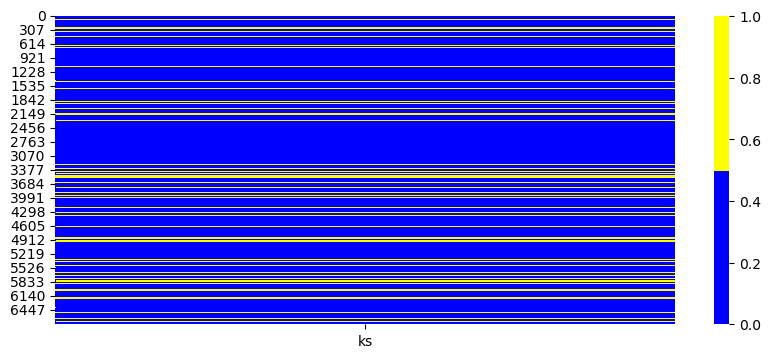

In [311]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    df_8_2[cols].isnull(),
    cmap=sns.color_palette(colors),
)

<img src="./img/img_8_2_heatmap.png" alt="Пропуски у вакансий без указания сферы деятельности" />

# вывод по пропуска 8_2
- видно что пропуски расположены без особой закономерности, хотя для вакансий с большей средней зп их меньше.

In [312]:
#ТОП 10 по количесту необходимых вакансий 
df_8_2['vac'].value_counts().sort_values(ascending=False).head(10)

системный администратор             454
программист 1с                      236
компьютерный мастер                 205
инженер-программист                 139
специалист технической поддержки    100
программист                          84
программист 1c                       83
ведущий программист 1c               80
ученик компьютерного мастера         79
аналитик                             46
Name: vac, dtype: int64

In [313]:
#создаем колонку list_ks в наше датафрейме df_7_4
df_8_2['list_ks'] = df_8_2['ks'].apply(get_list_ks)
#удаляем колонку ks
df_8_2 = df_8_2.drop(['ks'],axis=1)
#получаем список всех ks
all_ks_8_2 = get_all_ks(df_8_2)
all_ks_list_8_2 = list(all_ks_8_2) + ['пусто']
#выводим количество ВСЕХ ключевых навыков (ks)
display(len(all_ks_list_8_2))

3196

In [315]:
#!!!!_ВНИМАНИЕ_!!!! СРЕДНЕЕ ВРЕМЯ ВЫПОЛНЕНИЯ 19.5s
#создаем df для колонок с ключевыми навыками и заполняем через contains_ks()
df_ks_8_2 =pd.DataFrame()
for each in all_ks_list_8_2:
    df_ks_8_2[each] = df_8_2['list_ks'].apply(contains_ks, ks_name=each)
   
# Заменяем список ks в list_ks на их количество 
df_ks_8_2['ks_cnt'] = df_8_2['list_ks'].apply(len) 
# добавляем строку Total
df_ks_8_2.loc['Total']= df_ks_8_2.sum()
merged_df = df_8_2.join(df_ks_8_2)

#выбираем топ500 вакансий по зп и далее с ними работаем
tree_df = merged_df[merged_df['ks_cnt']>0].head(500)
#строим график
fig = px.treemap(
    data_frame=tree_df, #DataFrame
    path=['city','vac', tree_df.index], #категориальный признак, для которого строится график
    values='salary_mean', #параметр, который сравнивается
    color='salary_mean',
    height=500, #высота
    width=1000, #ширина
    title='ТОП 500 вакансий по средней зп у работодателей без указания сферы деятельности (по локациям)' #заголовок
)

#отображаем график
#display(tree_df)
fig.show()


<img src="./img/img_8_2_treemap_top500.png" alt="ТОП 500 вакансий по средней зп"/>

# вывод по топ 500:
- ожидаем сфера деятельности отсуствует у иностанных вакансий и вакансий ближнего зарубежья
- самые высокооплачиваемы вакансии в Алматы, Москве, Германии, CПб
- Топ500 вакансий без указания сферы деятельности имеет среднюю зп минимум 200тыс.руб.

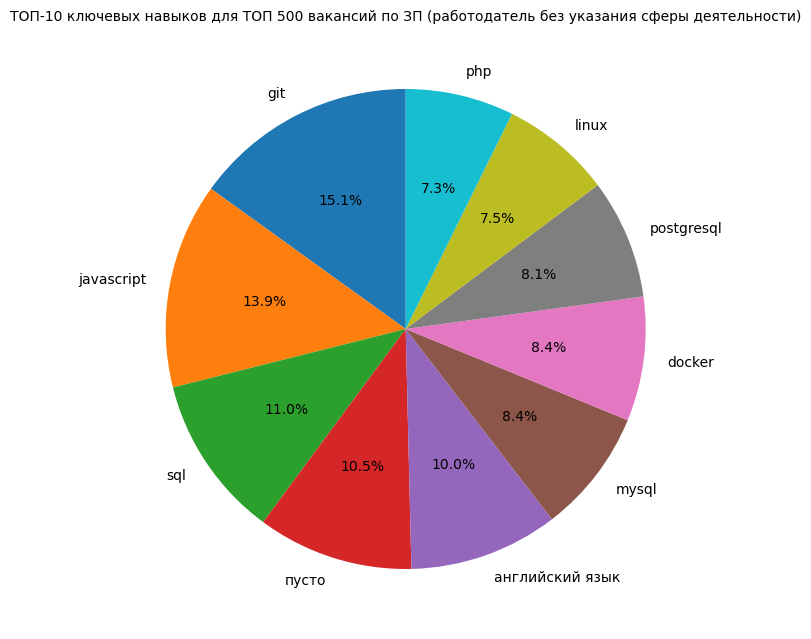

In [316]:
#создаем таблицу для распределения ключевых навыков по городам
bar_df = merged_df.groupby('city').sum().sort_values(by='salary_mean', ascending=False)
#удаляем неинформативые колонки 
if 'city' in tree_df.columns:  
    tree_df = tree_df.drop(['city'],axis=1)
    tree_df = tree_df.drop(['vac'],axis=1)
    tree_df = tree_df.drop(['salary_mean'],axis=1)
    tree_df = tree_df.drop(['list_ks'],axis=1)
#добавляем строку Total
tree_df.loc['Total']= tree_df.sum()

total_row_tdf=tree_df.iloc[-1][:-1]    
pop_ks_tdf = total_row_tdf.sort_values(ascending=False).head(10)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    pop_ks_tdf,
    labels=pop_ks_tdf.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('ТОП-10 ключевых навыков для TOП 500 вакансий по ЗП (работодатель без указания сферы деятельности)', fontsize=10)
plt.show(pie)

<img src="./img/img_8_2_kspie.png" alt="ТОП 10 ключевых навыков без указания сферы деятельности" />

# вывод по топ10 ключевым навыкам:
 - среди вакансий у которых не указана сфера деятельности самыми упоминаемыми в вакансиях это: git,javascript,sql - это указывает на то, что в основном вакансии связанные с веб и frontend разработкой и базами данных.
 - английский язык указывает на то, что это вакансии для работы в международных командах и для решения международных кейсов

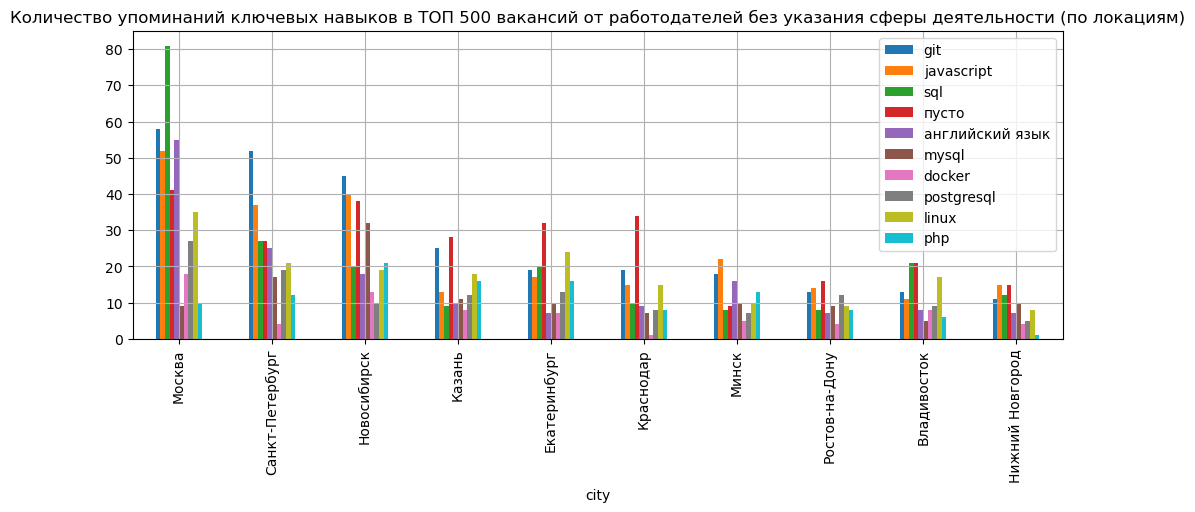

In [317]:
cities = pd.DataFrame()
pop_ks_8_2_top10_list = pop_ks_tdf.index.to_list()
cities = bar_df.sort_values(pop_ks_8_2_top10_list, ascending=False).head(10)
city_by_ks = cities[pop_ks_8_2_top10_list]
city_by_ks.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    legend=True,
    title='Количество упоминаний ключевых навыков в ТОП 500 вакансий от работодателей без указания сферы деятельности (по локациям)'
);

<img src="./img/img_8_2_ksbar.png" alt="ТОП 10 ключевых навыков без указания сферы деятельности по локациям" />

# вывод по ключевым навыкам относительно локаций
 - вакансии с упоминанием git, javascript, sql, английский язык в основнов находятся в Москве, СПб и Новосибирске.
 - вакансии у которых ключевой навык не укан - в Москве, Новосибирске, Краснодаре
 

# Запрос 8_3
- подробнее посмотри на вакансии у которых только одна сфера деятельности

In [318]:
query_8_3 = f'''
with vacancies_new as (/*формируем таблицу vacancies_new*/

with employer_w_ind as (/*формируем таблицу работодателей со сферой деятельности*/
select 
    e.id emp_ind_id, /*id работодателя*/
    e.name emp_ind_name, /*название работодателя*/
    count(industry_id) ind_ctn /*количество сфер дейтельности*/
from employers e
    LEFT JOIN employers_industries ei on e.id = ei.employer_id /*используе LEFT JOIN так как сфер дейятельности может быть несколько*/
WHERE industry_id IS NOT NULL /*где указана сфера деятельности*/
GROUP by e.name, e.id /*группируем по имени и по id*/
HAVING count(industry_id) = 1 /*количество сфер деятельности = 1*/
)
/*из таблицы vacancies выбираем необходимые поля*/
select 
    a.name city, /*локация размещения вакансии*/
    lower(v.name) vac, /*полное наименование вакансии в нижнем регистре*/
    e.emp_ind_name em, /*полное наименование работодателя*/
    v.experience ex, /*необходимый опыт*/
    v.employment emp, /*условия трудоустройства*/
    lower(v.key_skills) ks, /*ключевые навыки в нижнем регистре*/
    salary_from sfo, /*верхняя граница зп*/
    salary_to sto /*начальная зп*/
from 
    vacancies v
    JOIN employer_w_ind e ON e.emp_ind_id = v.employer_id /*объединяем с таблицей работодателей со сферой деятельности по id работодателя*/
    JOIN areas a ON a.id = v.area_id /*объединяем с таблицей area по id*/
    
)

select 
    city,
    vac,
    ks,
    (coalesce(sfo, 0) + coalesce(sto, 0))/2 salary_mean /*средняя зп*/
FROM vacancies_new  
WHERE sfo is not null /*где зп указано*/
    AND sto is not null
UNION ALL
Select 
    city,
    vac,
    ks,
    sfo salary_mean /*средняя зп*/
FROM vacancies_new  
WHERE sfo is not null /*где указана только верхняя зп*/
    AND sto is null
UNION ALL
Select 
    city,
    vac,
    ks,
    sto salary_mean /*средняя зп*/
FROM vacancies_new  
WHERE sfo is null /*где указана только начальная зп*/
    AND sto is not null
ORDER by 4 DESC /*сортируем по средней зп по убыванию*/
'''

In [319]:
df_8_3 = pd.read_sql_query(query_8_3, connection)
display(df_8_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8235 entries, 0 to 8234
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         8235 non-null   object
 1   vac          8235 non-null   object
 2   ks           5802 non-null   object
 3   salary_mean  8235 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 257.5+ KB


None

In [320]:
cols_null_percent = df_8_3.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

ks    29.544627
dtype: float64

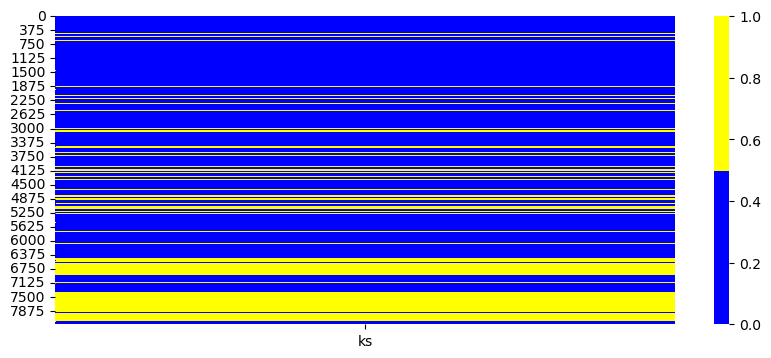

In [321]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    df_8_3[cols].isnull(),
    cmap=sns.color_palette(colors),
)

<img src="./img/img_8_3_heatmap.png" alt="Пропуск в вакансиях с одной сферой деятельности" />

# вывод по пропуска у вакансий с одной сферой деятельности:
- прослеживается четкий градиент - чем больше средняя зп, тем меньше пропусков в ключевых навыках.


In [322]:
#топ 10 по количеству необходимых вакансий
df_8_3['vac'].value_counts().sort_values(ascending=False).head(10)

системный администратор                                                   309
специалист службы поддержки в яндекс бизнес                               168
программист 1с                                                            164
специалист службы поддержки рекламной сети яндекса и adfox                139
специалист службы поддержки пользователей                                 109
сотрудник поддержки поиска яндекса                                         99
специалист поддержки в yandex cloud                                        97
специалист технической поддержки                                           88
специалист службы поддержки с техническими знаниями (умные устройства)     84
специалист службы поддержки с техническими знаниями в диск                 75
Name: vac, dtype: int64

In [323]:
#создаем колонку list_ks в наше датафрейме df_7_4
df_8_3['list_ks'] = df_8_3['ks'].apply(get_list_ks)
#удаляем колонку ks
df_8_3 = df_8_3.drop(['ks'],axis=1)
#получаем список всех ks
all_ks_8_3 = get_all_ks(df_8_3)
all_ks_list_8_3 = list(all_ks_8_3) + ['пусто']
#выводим количество ВСЕХ ключевых навыков (ks)
display(len(all_ks_list_8_3))

3323

In [326]:
#!!!!_ВНИМАНИЕ_!!!! СРЕДНЕЕ ВРЕМЯ ВЫПОЛНЕНИЯ 24.3s
#создаем df для колонок с ключевыми навыками и заполняем через contains_ks()
df_ks_8_3 =pd.DataFrame()
for each in all_ks_list_8_3:
    df_ks_8_3[each] = df_8_3['list_ks'].apply(contains_ks, ks_name=each)
   
# Заменяем список ks в list_ks на их количество 
df_ks_8_3['ks_cnt'] = df_8_3['list_ks'].apply(len) 
# добавляем строку Total
df_ks_8_3.loc['Total']= df_ks_8_3.sum()
merged_df_8_3 = df_8_3.join(df_ks_8_3)

#tree_df = merged_df.groupby('city').sum().sort_values(by='ks_cnt', ascending=False)
tree_df_8_3 = merged_df_8_3[merged_df_8_3['ks_cnt']>0].head(500)
#строим график
fig = px.treemap(
    data_frame=tree_df_8_3, #DataFrame
    path=['city','vac', tree_df_8_3.index], #категориальный признак, для которого строится график
    values='salary_mean', #параметр, который сравнивается
    color='salary_mean',
    height=500, #высота
    width=1000, #ширина
    title='ТОП 500 вакансий по средней зп у работодателей с одной сферой деятельности (по локациям)' #заголовок
)

#отображаем график
#display(tree_df_8_3)
fig.show()

<img src="./img/img_8_3_treemap_top500.png" alt="Топ 500 вакансий по средней зп с одной сферой деятельности" />

# вывод по топ500 вакансий с одной сферой деятельности
- самые высокооплачиваемы вакансии в СПб, Алматы, Москве, Уфе, Перми, Новосибирске, Краснодаре
- Топ500 вакансий без указания сферы деятельности имеет среднюю зп минимум 200тыс.руб.

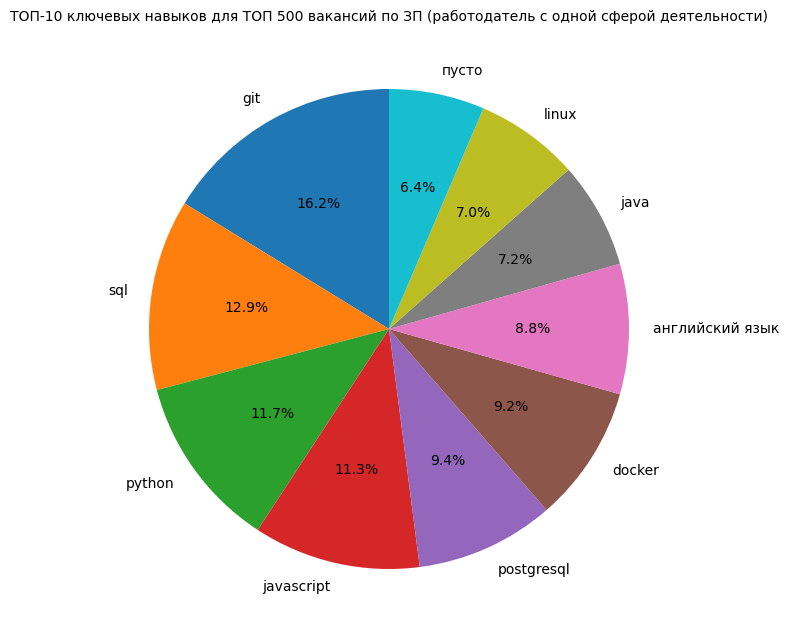

In [327]:
bar_df_8_3 = merged_df_8_3.groupby('city').sum().sort_values(by='salary_mean', ascending=False)
#удаляем неинформативые колонки 
if 'city' in tree_df_8_3.columns:  
    tree_df_8_3 = tree_df_8_3.drop(['city'],axis=1)
    tree_df_8_3 = tree_df_8_3.drop(['vac'],axis=1)
    tree_df_8_3 = tree_df_8_3.drop(['salary_mean'],axis=1)
    tree_df_8_3 = tree_df_8_3.drop(['list_ks'],axis=1)
#добавляем строку Total
tree_df_8_3.loc['Total']= tree_df_8_3.sum()

total_row_tdf_8_3=tree_df_8_3.iloc[-1][:-1]    
pop_ks_tdf_8_3 = total_row_tdf_8_3.sort_values(ascending=False).head(10)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    pop_ks_tdf_8_3,
    labels=pop_ks_tdf_8_3.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('ТОП-10 ключевых навыков для TOП 500 вакансий по ЗП (работодатель c одной сферой деятельности)', fontsize=10)
plt.show(pie)

<img src="./img/img_8_3_kspie.png" alt="Топ 10 ключевых навыков по средней зп с одной сферой деятельности" />


# вывод по ключевым навыкам:
 - ключевые навыки чаще упоминанаемые у вакансий с одной сферой деятельности - git, sql, python, javascript, postgresql
  Это говорит о том, высокооплачиваемые специалисты работают с данными и с функционалом с ними связанным.

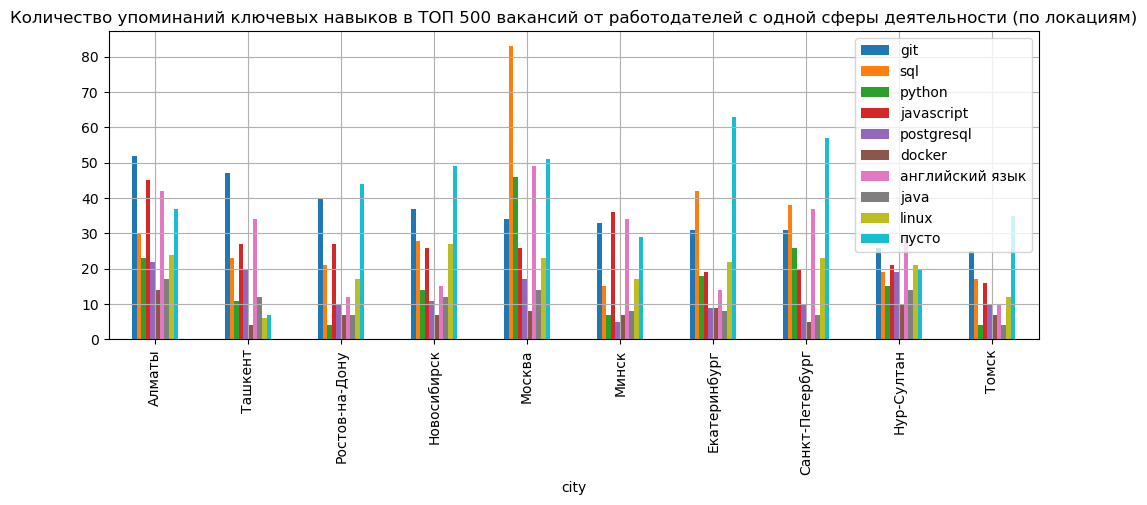

In [329]:
cities_8_3 = pd.DataFrame()
pop_ks_8_3_top10_list = pop_ks_tdf_8_3.index.to_list()
cities_8_3 = bar_df_8_3.sort_values(pop_ks_8_3_top10_list, ascending=False).head(10)
city_by_ks_8_3 = cities_8_3[pop_ks_8_3_top10_list]
city_by_ks_8_3.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    legend=True,
    title='Количество упоминаний ключевых навыков в ТОП 500 вакансий от работодателей с одной сферы деятельности (по локациям)'
);

<img src="./img/img_8_3_ksbar.png" alt="Ключевые навыки по средней зп с одной сферой деятельности"/>


# вывод по ключевым навыкам относительно локаций
 - git чаще встречается в вакансиях  - Алматы, Ташкент, Ростов-на-дону, Новосибирск, Москва
 - sql в Москве
 - python в Москве
 - Пропуски чаще в Екатеринбуре, Спб, Москве
 - В Москве более широкий спектр всех ключевых навыков, так и зарплат разного уровня у вакансий 

# Запрос 8_4
 - проанализируем более детально вакансии от работодателей у которых более 4 сфер деятельности

In [330]:
query_8_4 = f'''
with vacancies_new as (/*формируем таблицу vacancies_new*/

with employer_w_ind as (/*формируем таблицу работодателей со сферой деятельности*/
select 
    e.id emp_ind_id, /*id работодателя*/
    e.name emp_ind_name, /*название работодателя*/
    count(industry_id) ind_ctn /*количество сфер дейтельности*/
from employers e
    LEFT JOIN employers_industries ei on e.id = ei.employer_id /*используе LEFT JOIN так как сфер дейятельности может быть несколько*/
WHERE industry_id IS NOT NULL /*где указана сфера деятельности*/
GROUP by e.name, e.id /*группируем по имени и по id*/
HAVING count(industry_id) >= 4 /*количество сфер деятельности 4 и больше*/
)
/*из таблицы vacancies выбираем необходимые поля*/
select 
    a.name city, /*локация размещения вакансии*/
    lower(v.name) vac, /*полное наименование вакансии в нижнем регистре*/
    e.emp_ind_name em, /*полное наименование работодателя*/
    v.experience ex, /*необходимый опыт*/
    v.employment emp, /*условия трудоустройства*/
    lower(v.key_skills) ks, /*ключевые навыки в нижнем регистре*/
    salary_from sfo, /*верхняя граница зп*/
    salary_to sto /*начальная зп*/
from 
    vacancies v
    JOIN employer_w_ind e ON e.emp_ind_id = v.employer_id /*объединяем с таблицей работодателей со сферой деятельности по id работодателя*/
    JOIN areas a ON a.id = v.area_id /*объединяем с таблицей area по id*/
    
)

select 
    city,
    vac,
    ks,
    ex,
    (coalesce(sfo, 0) + coalesce(sto, 0))/2 salary_mean /*средняя зп*/
FROM vacancies_new  
WHERE sfo is not null /*где зп указано*/
    AND sto is not null
UNION ALL
Select 
    city,
    vac,
    ks,
    ex,
    sfo salary_mean /*средняя зп*/
FROM vacancies_new  
WHERE sfo is not null /*где указана только верхняя зп*/
    AND sto is null
UNION ALL
Select 
    city,
    vac,
    ks,
    ex,
    sto salary_mean /*средняя зп*/
FROM vacancies_new  
WHERE sfo is null /*где указана только начальная зп*/
    AND sto is not null
ORDER by 4 DESC /*сортируем по средней зп по убыванию*/
'''

In [331]:
df_8_4 = pd.read_sql_query(query_8_4, connection)
display(df_8_4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         2739 non-null   object
 1   vac          2739 non-null   object
 2   ks           2315 non-null   object
 3   ex           2739 non-null   object
 4   salary_mean  2739 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 107.1+ KB


None

In [332]:
cols_null_percent = df_8_4.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

ks    15.480102
dtype: float64

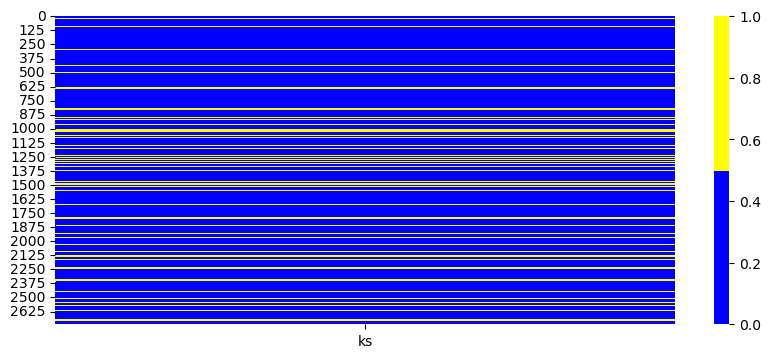

In [333]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    df_8_4[cols].isnull(),
    cmap=sns.color_palette(colors),
)

<img src="./img/img_8_4_heatmap.png" alt="Пропуски в вакансиях с 4мя и более сферами деятельности"/>


# вывод по пропускам в вакансиях с
- пропуски распределенны примерно одинаков по всем вакансиям, но прослеживается что верхней части, где средняя зп выше - там пропусков меньше

In [334]:
#ТОП 10 вакансий по количеству
df_8_4['vac'].value_counts().sort_values(ascending=False).head(10)


системный администратор             141
программист 1с                       86
мастер по обслуживанию абонентов     51
аналитик                             37
инженер технической поддержки        35
программист 1c                       34
специалист технической поддержки     31
программист                          24
бизнес-аналитик                      24
инженер-программист                  23
Name: vac, dtype: int64

In [335]:
#создаем колонку list_ks в наше датафрейме df_7_4
df_8_4['list_ks'] = df_8_4['ks'].apply(get_list_ks)
#удаляем колонку ks
#df_8_4 = df_8_4.drop(['ks'],axis=1)
#получаем список всех ks
all_ks_8_4 = get_all_ks(df_8_4)
all_ks_list_8_4 = list(all_ks_8_4) + ['пусто']
#выводим количество ВСЕХ ключевых навыков (ks)
display(len(all_ks_list_8_4))

2048

In [336]:
#!!!!_ВНИМАНИЕ_!!!! СРЕДНЕЕ ВРЕМЯ ВЫПОЛНЕНИЯ 5.9s
#создаем df для колонок с ключевыми навыками и заполняем через contains_ks()
df_ks_8_4 =pd.DataFrame()
for each in all_ks_list_8_4:
    df_ks_8_4[each] = df_8_4['list_ks'].apply(contains_ks, ks_name=each)
   
# Заменяем список ks в list_ks на их количество 
df_ks_8_4['ks_cnt'] = df_8_4['list_ks'].apply(len) 
# добавляем строку Total
df_ks_8_4.loc['Total']= df_ks_8_4.sum()
merged_df_8_4 = df_8_4.join(df_ks_8_4)

#tree_df = merged_df.groupby('city').sum().sort_values(by='ks_cnt', ascending=False)
tree_df_8_4 = merged_df_8_4[merged_df_8_4['ks_cnt']>0].head(500)
#строим график
fig = px.treemap(
    data_frame=tree_df_8_4, #DataFrame
    path=['city','vac', tree_df_8_4.index], #категориальный признак, для которого строится график
    values='salary_mean', #параметр, который сравнивается
    color='salary_mean',
    height=500, #высота
    width=1000, #ширина
    title='ТОП 500 вакансий по средней зп у работодателей более чем с 4 и более сферой деятельности (по локациям)' #заголовок
)

#отображаем график
#display(tree_df_8_4)
fig.show()

<img src="./img/img_8_4_treemap_top500.png" alt="Топ 500 вакансий по средней зп с 4 и более сферой деятельности" />


# вывод по топ 500 вакансий с 4 и более сферой деятельности
 - хоть тут верхня планка и ниже миллиона рублей, но даже по цвету графика ясно что средння зп у таких вакансий заметно выше

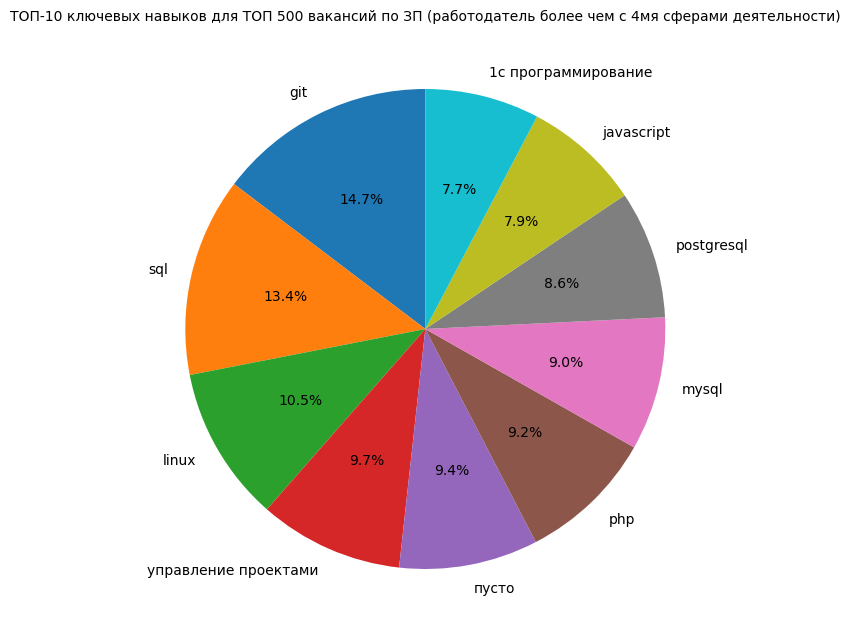

In [337]:
bar_df_8_4 = merged_df_8_4.groupby('city').sum().sort_values(by='salary_mean', ascending=False)
#удаляем неинформативые колонки 
if 'city' in tree_df_8_4.columns:  
    tree_df_8_4 = tree_df_8_4.drop(['city'],axis=1)
    tree_df_8_4 = tree_df_8_4.drop(['vac'],axis=1)
    tree_df_8_4 = tree_df_8_4.drop(['salary_mean'],axis=1)
    tree_df_8_4 = tree_df_8_4.drop(['ex'],axis=1)
    tree_df_8_4 = tree_df_8_4.drop(['ks'],axis=1)
    tree_df_8_4 = tree_df_8_4.drop(['list_ks'],axis=1)
#добавляем строку Total
tree_df_8_4.loc['Total']= tree_df_8_4.sum()

total_row_tdf_8_4=tree_df_8_4.iloc[-1][:-1]    
pop_ks_tdf_8_4 = total_row_tdf_8_4.sort_values(ascending=False).head(10)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    pop_ks_tdf_8_4,
    labels=pop_ks_tdf_8_4.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('ТОП-10 ключевых навыков для TOП 500 вакансий по ЗП (работодатель более чем c 4мя сферами деятельности)', fontsize=10)
plt.show(pie)

<img src="./img/img_8_4_kspie.png" alt="Ключевые навыки у вакансий с 4 и более сферой деятельности" />


# вывод
 - ключевыми и часто встречающимися в вакансиях навыки - git, sql, linux, управление проектами
 - особенно показательно появление этом топе навыка управления проектами - это говорит о том, что у компаний с большим числом сфер деятельности много проектной работы как в своих процессах так и смежных.

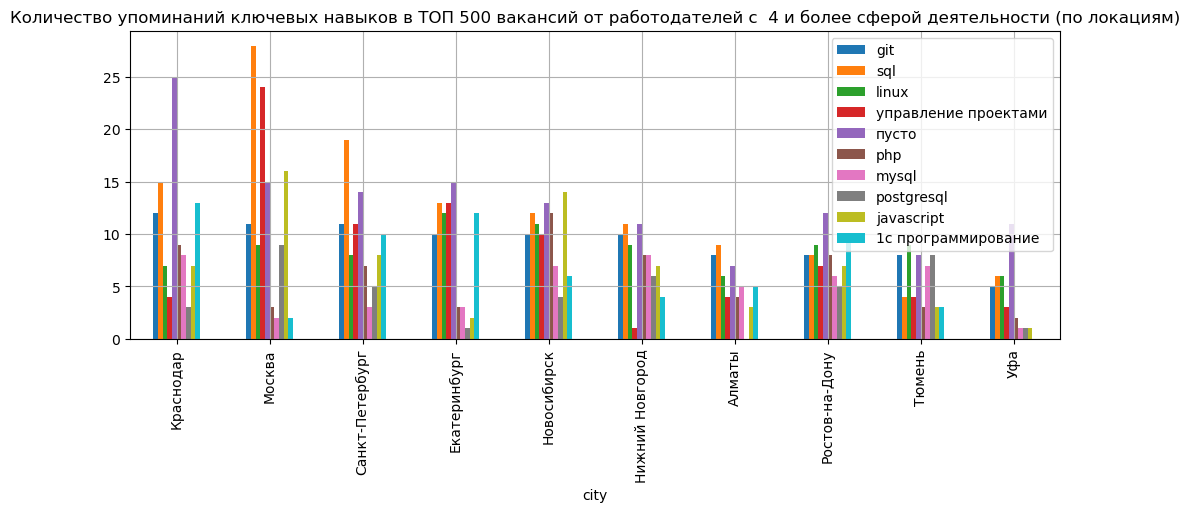

In [339]:
cities_8_4 = pd.DataFrame()
pop_ks_8_4_top10_list = pop_ks_tdf_8_4.index.to_list()
cities_8_4 = bar_df_8_4.sort_values(pop_ks_8_4_top10_list, ascending=False).head(10)
city_by_ks_8_4 = cities_8_4[pop_ks_8_4_top10_list]
city_by_ks_8_4.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    legend=True,
    title='Количество упоминаний ключевых навыков в ТОП 500 вакансий от работодателей с  4 и более сферой деятельности (по локациям)'
);

<img src="./img/img_8_4_ksbar.png" alt="Топ 500 вакансий по средней зп с 4 и более сферой деятельности"/>


# вывод по ключевым навыком относительно локаций:
- по git чаще всего попадается в вакансиях Краснодара, Москвы и СПб
- sql - Москва, СПб, Краснодар, Екатеринбург
- управление проектами в Москве
- пропуски чаще в Краснодаре

Управляющие компании, в которые требуются вакансии с ключевыми навыким по управлению проектами, чаще всего находятся в Москве

# Запрос 8_6
- исследуем более детально ключевые навыки в ТОП500 вакансий из разных выборок

In [345]:
# текст запроса
query_8_6 = f'''
with xx as (
    with x as (
    select 
        lower(v.name) vac,
        lower(v.key_skills) ks,
        experience,
        salary_from,
        salary_to
    from 
        vacancies v
    )
    select 
        ks ks,
        salary_from sfo,
        salary_to sto,
        experience ex
    from x
    WHERE 
        ks like '%1с программирование%'
        OR ks like '%1с: предприятие 8%'
        OR ks like '%docker%'
        OR ks like '%git%'
        OR ks like '%java%'
        OR ks like '%javascript%'
        OR ks like '%linux%'
        OR ks like '%mysql%'
        OR ks like '%php%'
        OR ks like '%postgresql%'
        OR ks like '%python%'
        OR ks like '%sql%'
        OR ks like '%английский язык%'
        OR ks like '%информационные технологии%'
        OR ks like '%управление проектами%'
)

Select 
    ex,
    ks,
    (coalesce(sfo, 0) + coalesce(sto, 0))/2 salary_mean
FROM xx 
WHERE sfo is not null 
    AND sto is not null
UNION ALL
Select 
    ex,
    ks,
    sfo salary_mean
FROM xx 
WHERE sfo is not null 
    AND sto is null
UNION ALL
Select 
    ex,
    ks,
    sto salary_mean
FROM xx 
WHERE sfo is null 
    AND sto is not null
ORDER by 3 DESC
'''

In [346]:
df_8_6 = pd.read_sql_query(query_8_6, connection)
display(df_8_6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ex           10243 non-null  object
 1   ks           10243 non-null  object
 2   salary_mean  10243 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 240.2+ KB


None

In [347]:
#составим лист и словарь по всем ключевым навыкам и найдем среднюю зп для опыта от 3 лет
all_top_ks_list = pop_ks_8_4_top10_list + pop_ks_8_3_top10_list + pop_ks_8_2_top10_list     

result_top = set(all_top_ks_list) 
all_top = list(result_top)

df_ks_by_mean_sal = pd.DataFrame(columns=['ks','mean_sal_after_3year'])
for each in all_top:
    if each != 'пусто':
        row = {'ks':each,'mean_sal_after_3year':round(df_8_6[(df_8_6['ex'] == 'От 3 до 6 лет') & (df_8_6['ks'].str.contains(each)) ]['salary_mean'].mean())}
        df_ks_by_mean_sal = df_ks_by_mean_sal.append(row, ignore_index=True)
 

display(df_ks_by_mean_sal.sort_values(by='mean_sal_after_3year', ascending=False))    

,ks,mean_sal_after_3year
5,docker,214570
10,python,203300
8,postgresql,189526
4,java,189472
3,git,178583
6,javascript,178209
9,английский язык,167700
1,sql,162956
12,php,153199
0,mysql,150134


# Запрос 8_7
- проанализируем более детально вакансии с зп в которых указана удаленная работа и полная занятость

In [348]:
# текст запроса
query_8_7 = f'''
with xx as (
    with x as (
    select 
        a.name city,
        lower(v.name) vac,
        lower(v.key_skills) ks,
        v.experience ex,
        v.employment emp,
        v.schedule sch,
        v.salary_from sfo,
        v.salary_to sto
    from 
        vacancies v
        JOIN employers e ON e.id = v.employer_id
        JOIN areas a ON a.id = v.area_id
    )
    select 
        city,
        vac,
        ks,
        emp,
        sch,
        sfo,
        sto,
        ex
    from x
    WHERE 
        sch = 'Удаленная работа'
        AND emp = 'Полная занятость'
)

Select 
    city,
    vac,
    ex,
    ks,
    (coalesce(sfo, 0) + coalesce(sto, 0))/2 salary_mean
FROM xx 
WHERE sfo is not null 
    AND sto is not null
    
UNION ALL
Select 
    city,
    vac,
    ex,
    ks,
    sfo salary_mean
FROM xx 
WHERE sfo is not null 
    AND sto is null
    
UNION ALL
Select 
    city,
    vac,
    ex,
    ks,
    sto salary_mean
FROM xx 
WHERE sfo is null 
    AND sto is not null
   
ORDER by 5 DESC
'''

In [349]:
df_8_7 = pd.read_sql_query(query_8_7, connection)
display(df_8_7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713 entries, 0 to 3712
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         3713 non-null   object
 1   vac          3713 non-null   object
 2   ex           3713 non-null   object
 3   ks           2773 non-null   object
 4   salary_mean  3713 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 145.2+ KB


None

In [350]:
cols_null_percent = df_8_7.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

ks    25.316456
dtype: float64

In [351]:
#ТОП 10 вакансий по количеству
df_8_7['vac'].value_counts().sort_values(ascending=False).head(10)

специалист службы поддержки в яндекс бизнес                   168
программист 1с                                                165
специалист службы поддержки рекламной сети яндекса и adfox    139
ведущий программист 1c                                         75
тимлид клиентского сервиса                                     58
разработчик (поисковая выдача)                                 54
специалист технической поддержки                               40
эксперт по ответам на вопросы о яндекс бизнесе                 36
специалист по общению с клиентами в яндекс бизнес              35
специалист поддержки в яндекс бизнес                           32
Name: vac, dtype: int64

In [352]:
#создаем колонку list_ks в наше датафрейме df_7_4
df_8_7['list_ks'] = df_8_7['ks'].apply(get_list_ks)
#удаляем колонку ks
#df_8_7 = df_8_7.drop(['ks'],axis=1)
#получаем список всех ks
all_ks_8_7 = get_all_ks(df_8_7)
all_ks_list_8_7 = list(all_ks_8_7) + ['пусто']
#выводим количество ВСЕХ ключевых навыков (ks)
display(len(all_ks_list_8_7))

1914

In [353]:

#создаем df для колонок с ключевыми навыками и заполняем через contains_ks()
df_ks_8_7 =pd.DataFrame()
for each in all_ks_list_8_7:
    df_ks_8_7[each] = df_8_7['list_ks'].apply(contains_ks, ks_name=each)
   
# Заменяем список ks в list_ks на их количество 
df_ks_8_7['ks_cnt'] = df_8_7['list_ks'].apply(len) 
# добавляем строку Total
df_ks_8_7.loc['Total']= df_ks_8_7.sum()
merged_df_8_7 = df_8_7.join(df_ks_8_7)

#tree_df = merged_df.groupby('city').sum().sort_values(by='ks_cnt', ascending=False)
tree_df_8_7 = merged_df_8_7[merged_df_8_7['ks_cnt']>0].head(500)
#строим график
fig = px.treemap(
    data_frame=tree_df_8_7, #DataFrame
    path=['city','vac', tree_df_8_7.index], #категориальный признак, для которого строится график
    values='salary_mean', #параметр, который сравнивается
    color='salary_mean',
    height=500, #высота
    width=1000, #ширина
    title='ТОП 500 вакансий с удаленной работой и полной занятостью (по локациям)' #заголовок
)

#отображаем график
#display(tree_df_8_7)
fig.show()

<img src="./img/img_8_7_treemap_top500.png" alt="Топ 500 вакансий по средней зп с (удаленка с полной занятостью)" />


# вывод по ТОП500 вакансий с удаленной работой и полной занятостью
- самые высокооплачиваемые вакансии находятся в регионах - Пермь, Уфа
- есть вакансии из зарубежа
- вилка зп достаточно узка от 222тр до 600тр
- средняя зп на удаленке и полной занятости выше чем по рынку труда - видно по цвету

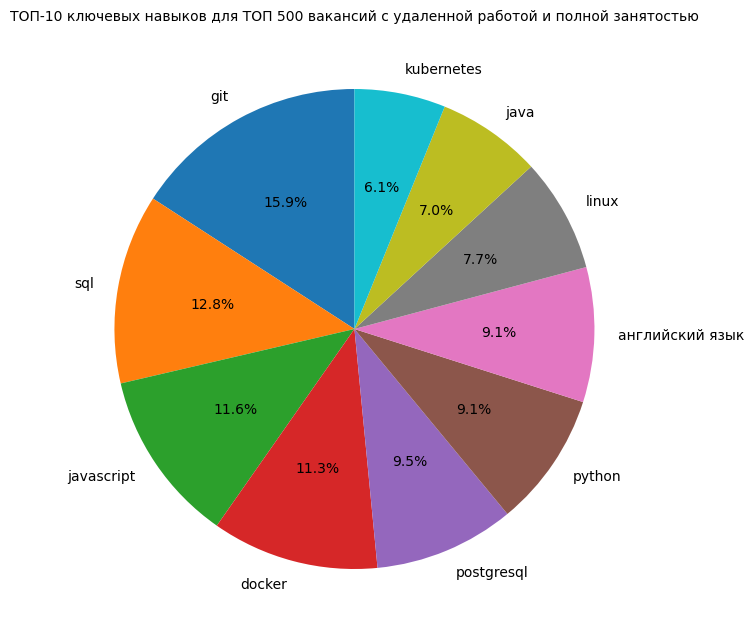

In [354]:
bar_df_8_7 = merged_df_8_7.groupby('city').sum().sort_values(by='ks_cnt', ascending=False)
#удаляем неинформативые колонки tree_df_8_7
if 'city' in tree_df_8_7.columns:  
    tree_df_8_7 = tree_df_8_7.drop(['city'],axis=1)
    tree_df_8_7 = tree_df_8_7.drop(['vac'],axis=1)
    tree_df_8_7 = tree_df_8_7.drop(['ex'],axis=1)
    tree_df_8_7 = tree_df_8_7.drop(['salary_mean'],axis=1)
    tree_df_8_7 = tree_df_8_7.drop(['list_ks'],axis=1)
#добавляем строку Total
tree_df_8_7.loc['Total']= tree_df_8_7.sum()
#получаем строку тотал
total_row_tdf_8_7=tree_df_8_7.iloc[-1][:-1]
#получаем 10 популярных ключевых навыка    
pop_ks_tdf_8_7 = total_row_tdf_8_7.sort_values(ascending=False).head(10)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    pop_ks_tdf_8_7,
    labels=pop_ks_tdf_8_7.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('ТОП-10 ключевых навыков для TOП 500 вакансий c удаленной работой и полной занятостью', fontsize=10)
plt.show(pie)

<img src="./img/img_8_7_kspie.png" alt="Топ 500 вакансий по средней зп с (удаленка с полной занятостью)" />


# вывод по ключевым навыкам 
 - чаще в вакансиях встречаются - git, sql, javascript, docker, postgres
 - по навыкам видно что это вакансии подходят для высококвалифицированных разработчиков, веб-разработчико, devops

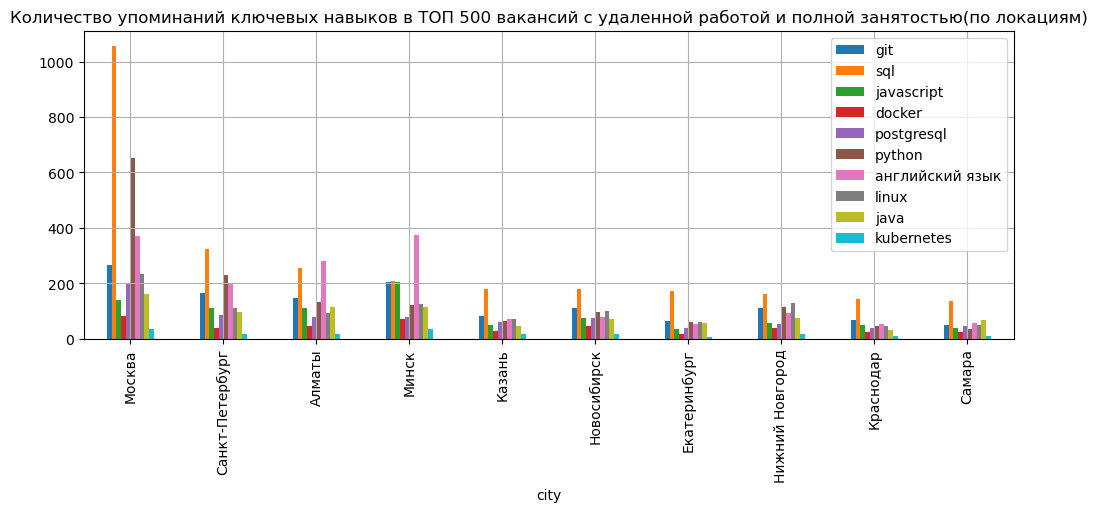

In [355]:
cities_8_7 = pd.DataFrame()
pop_ks_8_7_top10_list = pop_ks_tdf_8_7.index.to_list()
cities_8_7 = bar_df_8_7.sort_values(pop_ks_8_7_top10_list, ascending=False).head(10)
city_by_ks_8_7 = cities_8_5[pop_ks_8_7_top10_list]
city_by_ks_8_7.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    legend=True,
    title='Количество упоминаний ключевых навыков в ТОП 500 вакансий c удаленной работой и полной занятостью(по локациям)'
);

<img src="./img/img_8_7_ksbar.png" alt="Ключевые навыки вакансий по средней зп с (удаленка с полной занятостью)" />


# вывод по распределению ключевых навыках по локациям
 - явный лидер Москва
 

In [356]:
#составим таблицу со средней зп которая ожидает специлиста с такими ключевыми навыками через 3 год на основе средней зп текущих вакансий
result_top = set(pop_ks_8_7_top10_list) 
all_top = list(result_top)
df_ks_by_mean_sal_8_7 = pd.DataFrame(columns=['ks','mean_sal_after_3year'])
for each in all_top:
    if (pd.isnull(each) == False):
        row = {'ks':each,'mean_sal_after_3year':round(df_8_7[(df_8_7['ex'] == 'От 3 до 6 лет') & (df_8_7['ks'].str.contains(each))]['salary_mean'].mean())}
        df_ks_by_mean_sal_8_7 = df_ks_by_mean_sal_8_7.append(row, ignore_index=True)
        

display(df_ks_by_mean_sal_8_7.sort_values(by='mean_sal_after_3year', ascending=False))  

,ks,mean_sal_after_3year
9,kubernetes,273156
3,docker,250335
7,python,222653
5,английский язык,212205
2,java,209711
1,git,197194
4,javascript,193266
6,postgresql,192333
0,sql,180878
8,linux,179467


# ОБЩИЙ ВЫВОД:
- наличие ключевых навыков в описании это чаще показатель выкооплачиваемой должности
- компании с несколькими сферами деятельности в большинстве имеют более высокую среднюю зп 
- самые высокооплачиваемые профессии в большинстве своем связны с обработкой данных и ИТ.